In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [2]:
df = pd.read_csv('pupils.csv')

In [3]:
df.head()

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6
1,agam,6,GR,172,71,92,9200,5,4
2,avi,7,ISR,143,58,82,12000,3,7
3,dani,7,US,160,70,90,15000,4,4
4,dina,7,ISR,110,26,64,10000,6,8


In [4]:
df.describe()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,9.433333,137.266667,51.500000,80.500000,20096.666667,4.366667,5.833333
std,2.207875,26.286136,18.104581,7.942683,11943.270601,1.629117,1.743626
min,6.000000,90.000000,26.000000,64.000000,7600.000000,2.000000,3.000000
25%,8.000000,113.500000,34.000000,74.000000,11175.000000,3.000000,4.250000
50%,9.000000,132.000000,53.000000,82.000000,17650.000000,4.500000,6.000000
75%,11.000000,158.000000,65.500000,85.750000,23750.000000,5.750000,7.000000
max,14.000000,192.000000,90.000000,94.000000,54100.000000,7.000000,10.000000


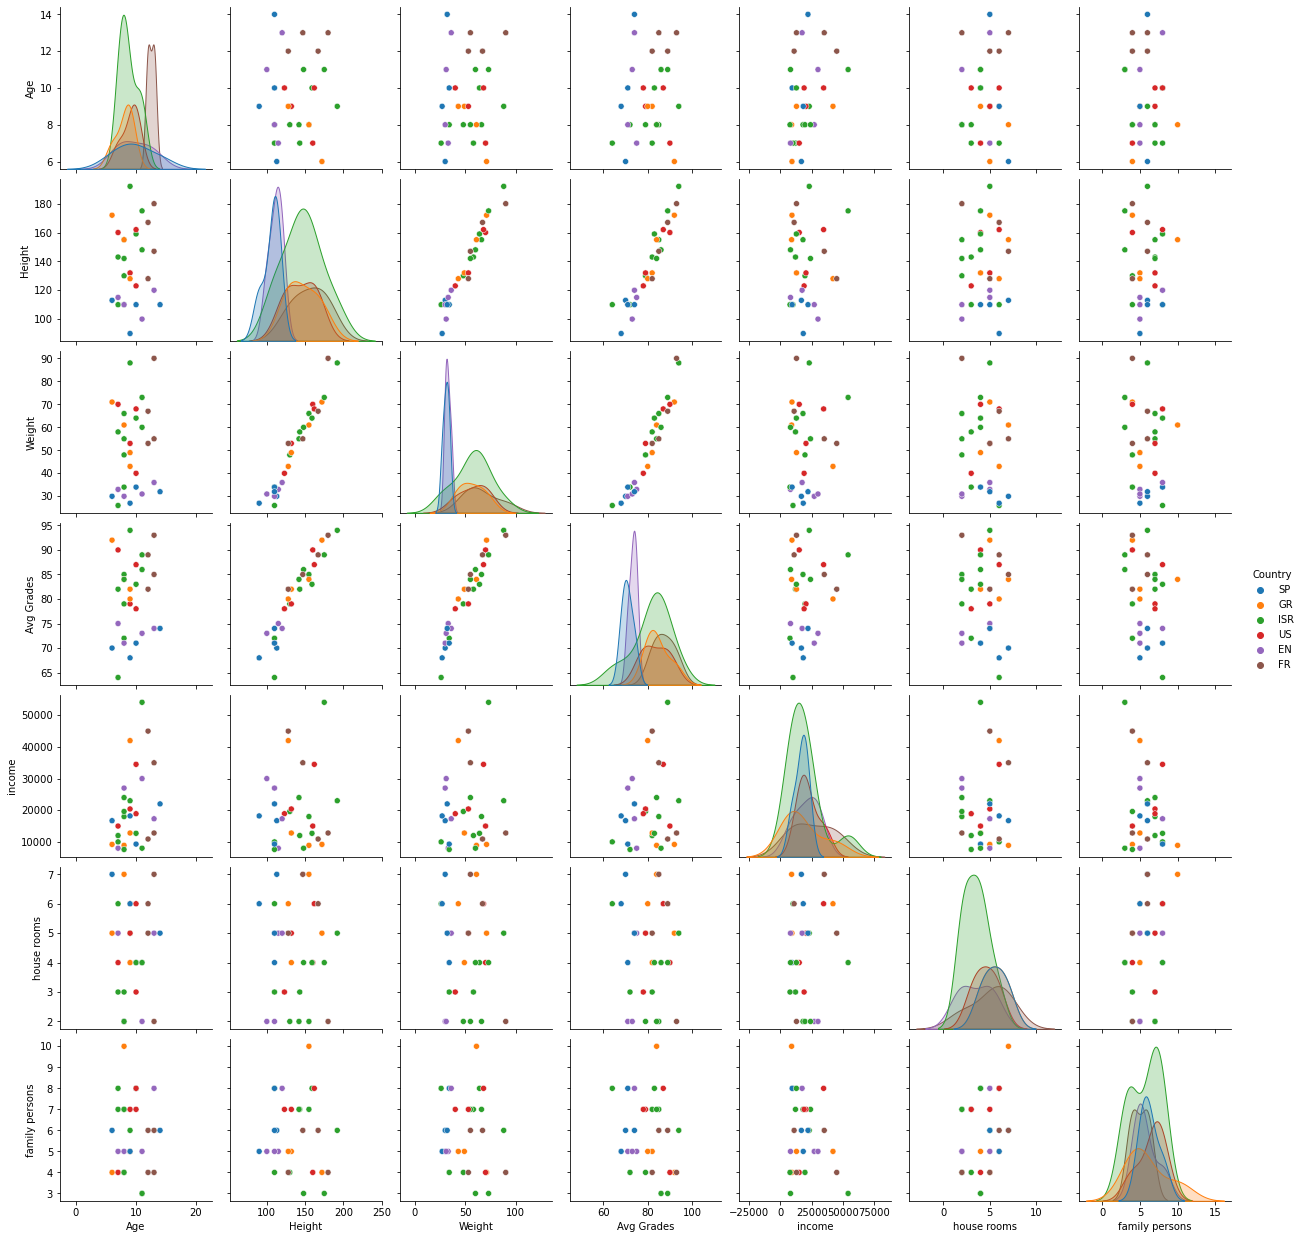

In [5]:
sns.pairplot(hue = 'Country',data=df)

In [7]:
import pandas as pd
import numpy as np


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            30 non-null     object
 1   Age             30 non-null     int64 
 2   Country         30 non-null     object
 3   Height          30 non-null     int64 
 4   Weight          30 non-null     int64 
 5   Avg Grades      30 non-null     int64 
 6   income          30 non-null     int64 
 7   house rooms     30 non-null     int64 
 8   family persons  30 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.2+ KB


In [9]:
df.columns

Index(['Name', 'Age', 'Country', 'Height', 'Weight', 'Avg Grades', 'income',
       'house rooms', 'family persons'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Grades', ylabel='Density'>

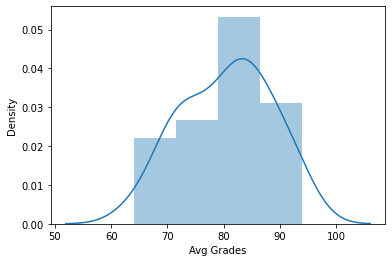

In [10]:
sns.distplot(df['Avg Grades'],kde=True)

In [11]:
# find out correlation between params
df.corr()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
Age,1.000000,0.074586,0.118616,0.150426,0.344763,0.040584,-0.052251
Height,0.074586,1.000000,0.974416,0.944887,0.079537,0.006496,-0.060690
Weight,0.118616,0.974416,1.000000,0.959074,0.091562,-0.084762,-0.125074
Avg Grades,0.150426,0.944887,0.959074,1.000000,0.145275,-0.065290,-0.212886
income,0.344763,0.079537,0.091562,0.145275,1.000000,0.062980,-0.241287
house rooms,0.040584,0.006496,-0.084762,-0.065290,0.062980,1.000000,0.289322
family persons,-0.052251,-0.060690,-0.125074,-0.212886,-0.241287,0.289322,1.000000


<AxesSubplot:>

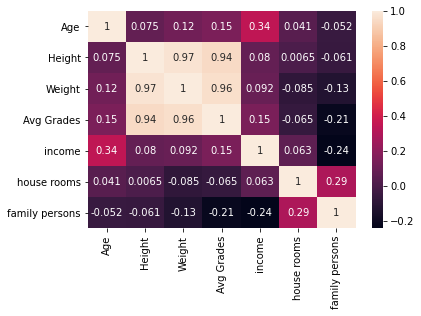

In [12]:
sns.heatmap(df.corr(),annot=True)

Now lets create a list of features as X axis and what we want to predict as y

In [13]:

X = df[['Height', 'Weight','income',
        'house rooms','family persons']]

In [14]:
X.head(2)

,Height,Weight,income,house rooms,family persons
0,113,30,16700,7,6
1,172,71,9200,5,4


In [15]:
y = df['Avg Grades']

In [16]:
type(y.values)

numpy.ndarray

We have a data and we want to build a model to predict targets 
We first need to test our model to see if it we give us the correct answers 
The solution is to split the data for example to 65% and 35% , run the model on 65% data, and then test on the 35% and see if the results are close to the real values. 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# y_test

In [20]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [21]:
import sklearn.linear_model as lin


In [22]:
model = lin.LinearRegression()


In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = model.predict(X_test)

In [25]:
predictions

array([99.32997556, 77.01223418, 86.66249598, 71.78394043, 80.57847224,
       74.45134213, 72.58229105, 87.84328222, 97.00227069])

In [26]:
y_test

27    93
15    80
23    86
17    71
8     79
9     72
28    74
24    89
12    94
Name: Avg Grades, dtype: int64

In [27]:
model.score(X_train,y_train)

0.9304544485195541

In [28]:
model.score(X_test,y_test)

0.8870844338926248

In [29]:
##########################
# calculate mean absolute error
# mean square error
# sqrt of the latter
# use sklearn metrics if possible

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test, predictions)

2.2634099532148246

In [32]:
metrics.mean_squared_error(y_test, predictions)

7.878997279492402

In [33]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.806955161646228

In [34]:
########################################

In [35]:
model.intercept_

60.89952662957511

In [36]:
model.coef_

array([ 2.07294238e-02,  4.18597290e-01, -1.96979311e-05, -8.85547468e-02,
       -6.36340118e-01])

In [37]:
X_train.columns

Index(['Height', 'Weight', 'income', 'house rooms', 'family persons'], dtype='object')

In [38]:
pd.DataFrame(model.coef_.reshape(-1,1),X_train.columns,columns=["Coeff"])

,Coeff
Height,0.020729
Weight,0.418597
income,-0.000020
house rooms,-0.088555
family persons,-0.636340


In [39]:
predictions

array([99.32997556, 77.01223418, 86.66249598, 71.78394043, 80.57847224,
       74.45134213, 72.58229105, 87.84328222, 97.00227069])

Now lets see if the model is ok - we compare the predictions with real results we grabbed from our data

In [40]:
y_test

27    93
15    80
23    86
17    71
8     79
9     72
28    74
24    89
12    94
Name: Avg Grades, dtype: int64

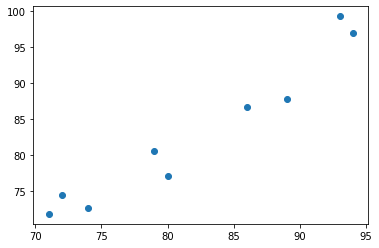

In [41]:
plt.scatter(y_test,predictions)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Grades', ylabel='Density'>

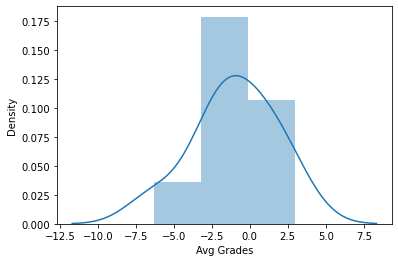

In [42]:
sns.distplot(y_test - predictions)

Now we can use the model to predict avg grade for a given set of features

In [43]:
X_train.columns

Index(['Height', 'Weight', 'income', 'house rooms', 'family persons'], dtype='object')

In [44]:
vals = np.array([100,30,10000,7,3]).reshape(1,-1)
model.predict(vals)

array([72.80450483])

In [45]:
#######################################################
# TRY WITH THE COUNTRY
#

In [46]:
df.head()

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6
1,agam,6,GR,172,71,92,9200,5,4
2,avi,7,ISR,143,58,82,12000,3,7
3,dani,7,US,160,70,90,15000,4,4
4,dina,7,ISR,110,26,64,10000,6,8


In [47]:
df.Country.unique()

array(['SP', 'GR', 'ISR', 'US', 'EN', 'FR'], dtype=object)

In [48]:
df = pd.get_dummies(df,columns=['Country'],drop_first=True)

In [49]:
df.head(10)

,Name,Age,Height,Weight,Avg Grades,income,house rooms,family persons,Country_FR,Country_GR,Country_ISR,Country_SP,Country_US
0,adar,6,113,30,70,16700,7,6,0,0,0,1,0
1,agam,6,172,71,92,9200,5,4,0,1,0,0,0
2,avi,7,143,58,82,12000,3,7,0,0,1,0,0
3,dani,7,160,70,90,15000,4,4,0,0,0,0,1
4,dina,7,110,26,64,10000,6,8,0,0,1,0,0
5,efrat,7,115,33,75,8000,5,5,0,0,0,0,0
6,ehud,8,155,66,85,18000,2,7,0,0,1,0,0
7,eli,8,155,61,84,8900,7,10,0,1,0,0,0
8,ester,8,130,48,79,19600,2,4,0,0,1,0,0
9,evyatar,8,110,34,72,7600,3,4,0,0,1,0,0


In [50]:
X = df.drop(['Avg Grades','Name'],axis=1)

In [51]:
y = df['Avg Grades']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.score(X_train,y_train)

0.9762081815452159

In [55]:
model.score(X_test,y_test)

0.6901341536928354

In [57]:
# 1. create ridge and lasso models
# 2. play with the lambda/alpha
# 3. see how the coef changes

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
model = lin.Ridge(alpha=0.01)
model.fit(X_train, y_train)
print(model.coef_)

[ 2.63894950e-01  1.45072426e-01  2.69518976e-01 -6.02211113e-05
 -9.26040955e-01 -3.17758508e-01  3.00939689e+00  8.59246231e-01
 -3.36433398e+00  1.24969940e+00 -2.61529056e-02]


In [144]:
model = lin.Ridge(alpha=100)
model.fit(X_train, y_train)
print(model.coef_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

[ 1.50530323e-01  7.22405053e-02  3.35909080e-01 -6.78354987e-06
 -8.68976004e-02 -2.25369213e-01  2.96771355e-02  4.47097356e-02
 -1.07595826e-01 -9.20292237e-03  1.46179928e-02]
0.9270478908794145
0.9285201858606291


In [145]:
model = lin.Lasso(alpha=1)
model.fit(X_train, y_train)
print(model.coef_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

[ 1.08072403e-02  1.35519123e-02  4.21755161e-01  5.45038312e-06
 -0.00000000e+00 -2.15508593e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
0.9264113781612988
0.922619101874554


In [56]:
###################
# OLS DEMO
# linear reg - statsmodels.ipynb